In [1]:
%config InlineBackend.figure_format = 'retina'

from matplotlib import rcParams
rcParams["savefig.dpi"] = 96
rcParams["figure.dpi"] = 96

# The Shin (2015) model

## Introduction

The model proposed by [Shin (2015)](http://dx.doi.org/10.1007/s12665-015-4588-z)
is an equivalent circuit that aims to reproduce SIP data This model
predicts that the complex resistivity spectra $\rho^*$ of a
polarizable rock sample can be described by

\begin{equation}
\rho^* = \sum_{i=1}^2 \frac{\rho_i}{(i\omega)^{n_i} \rho_iQ_i + 1}
\end{equation}

where $\omega$ is the measurement angular frequencies
($\omega=2\pi f$) and $i$ is the imaginary unit.

Here, $\rho^*$ depends on 3 pairs of parameters:

- $\rho_i \in [0, \infty)$, the resistivity of the resistance element in Shin's circuit.
- $Q_i \in [0, \infty)$, the capacitance of the CPE.
- $n_i \in [0, 1]$, the exponent of the CPE impedance (0 = resistor, 0.5 = warburg, 1.0 = capacitance).

In this tutorial we will perform batch inversion of all SIP data files provided with BISIP with the Shin (2015) and double Cole-Cole models, and we will compare their respective relaxation time ($\tau$) parameters.

## Exploring the parameter space

First import the required packages.

In [2]:
import numpy as np
from bisip import PeltonColeCole
from bisip import Shin2015
from bisip import DataFiles

np.random.seed(42)

In [3]:
# Load the data file paths
data_files = DataFiles()

results = {'Shin': {}, 
           'Pelton': {},
          }

nsteps = 1000
for fname, fpath in data_files.items():
        
        if fname == 'SIP-K389175':
            model = Shin2015(fpath, nsteps=nsteps)
            model.fit()
            results['Shin'][fname] = model

#             model = PeltonColeCole(fpath, nsteps=nsteps, n_modes=2)
#             model.fit()
#             results['Pelton'][fname] = model



100%|██████████| 1000/1000 [00:01<00:00, 724.53it/s]


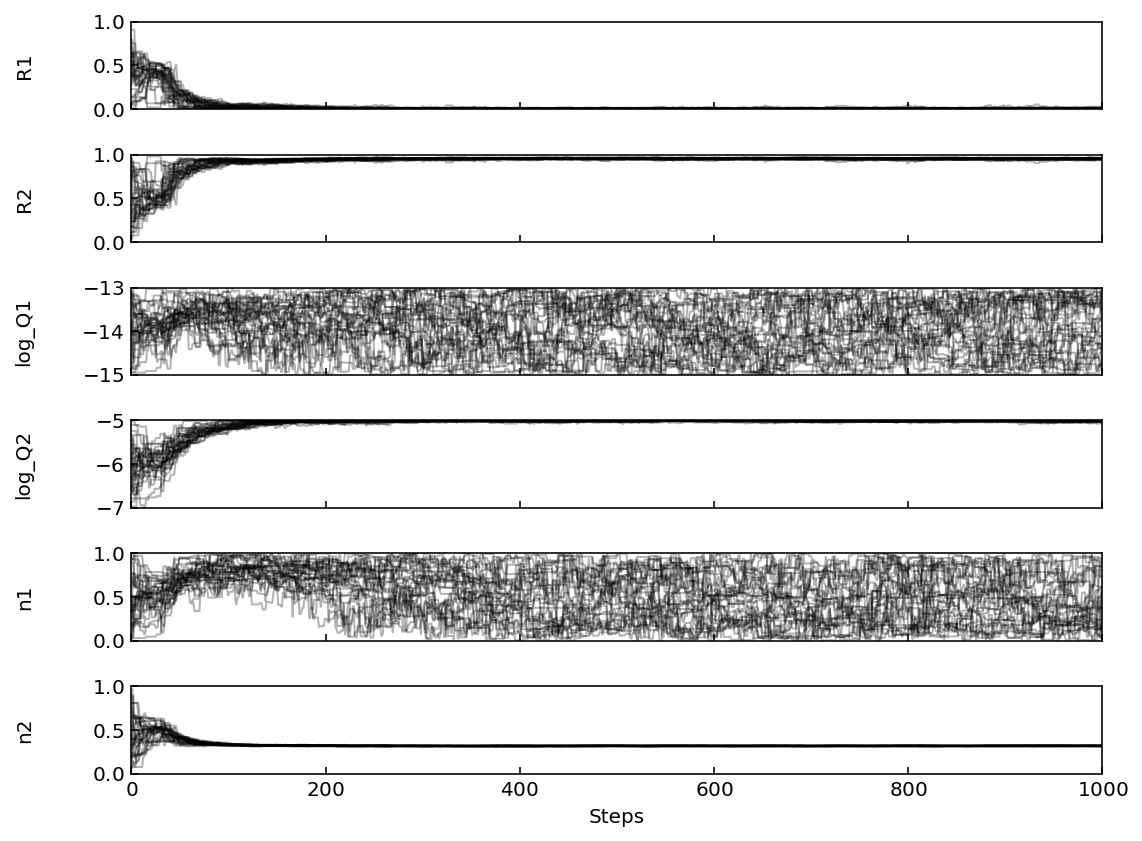

In [4]:
fig = results['Shin']['SIP-K389175'].plot_traces()

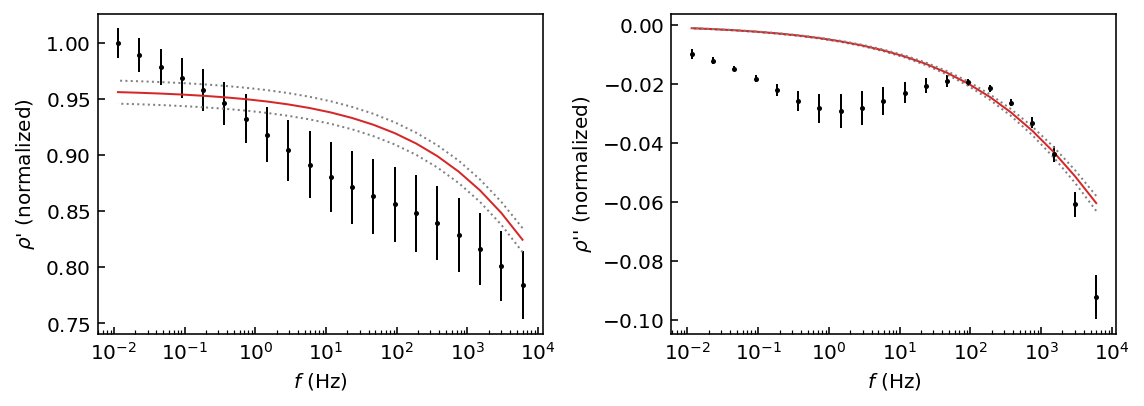

In [5]:
fig = results['Shin']['SIP-K389175'].plot_fit(discard=500)

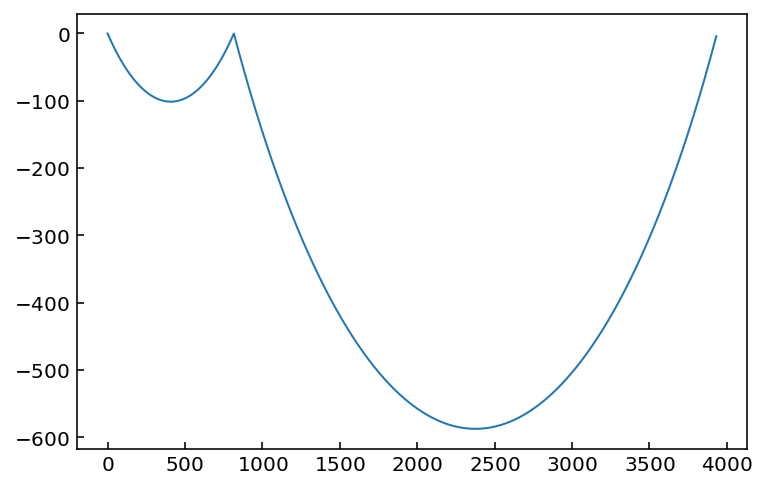

In [20]:
import matplotlib.pyplot as plt
freq = np.logspace(-2, 100, 10000)
w = 2*np.pi*freq
theta = np.array([8.16E02, 3.12E03, np.log(1.80E-14), np.log(2.25E-06), 0.3098, 0.4584])

Z = model.forward(theta, w)
plt.plot(*Z)

### Conclusions